# Let's try to predict the Stock Market 

In [65]:
import yfinance as yf 
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [66]:
ticker = "ABCB4.SA"
start_date = "2021-01-01"
today = datetime.now().strftime('%Y-%m-%d')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,15.794977,16.212465,15.715455,16.103123,13.125877,1579948
2021-01-05,16.142883,16.142883,15.635934,15.874499,12.939522,1177843
2021-01-06,15.904319,16.301928,15.854618,16.053423,13.085366,996056
2021-01-07,15.860000,16.250000,15.800000,16.240000,13.522296,1018500
2021-01-08,16.270000,16.490000,15.970000,16.219999,13.505641,1407000
...,...,...,...,...,...,...
2023-08-16,18.549999,18.790001,18.350000,18.410000,18.410000,644300
2023-08-17,18.440001,18.469999,18.100000,18.190001,18.190001,680800
2023-08-18,18.120001,18.270000,17.850000,18.270000,18.270000,1353400


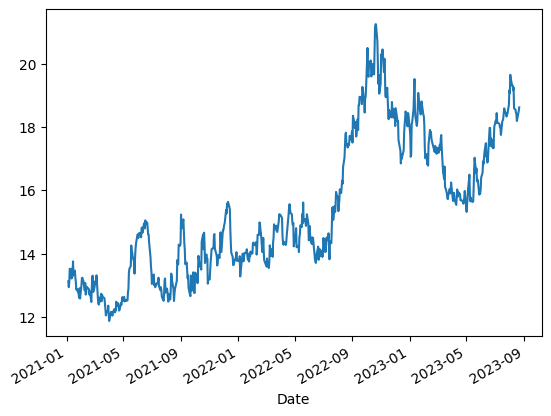

In [67]:
ticker_data = yf.download(ticker, start=start_date, end=today, progress=False)
ticker_data['Adj Close'].plot()
data = pd.DataFrame(ticker_data)
display(data)
prices = data['Close'].values.reshape(-1, 1)

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Preparar os dados
X, y = [], []
for i in range(60, len(scaled_prices)):
    X.append(scaled_prices[i-60:i, 0])
    y.append(scaled_prices[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Dividir os dados em treino e teste
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# LSTM

In [68]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32)

MSE: 1.4405913920336708


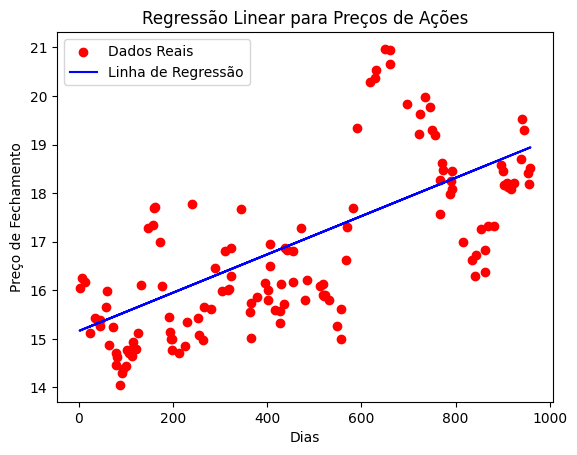

In [69]:

predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)